# Getting Dataset from Kaggle

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"u6yuvi","key":"1159d303ff92d109365c912ffadea448"}'}

In [2]:
!ls

kaggle.json  sample_data


In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Sep 22 08:03 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# List available datasets.
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2663            True  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10884           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4539            True  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         51           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       4193           False  
Kannada-MNIST                                  2019-12-17 23:59:00  Playground       Knowledge         62           False  
bigquery

In [7]:
# Copy the  data set locally.
!kaggle competitions download -c spooky-author-identification

  0% 0.00/29.4k [00:00<?, ?B/s]
100% 29.4k/29.4k [00:00<00:00, 11.1MB/s]
  0% 0.00/538k [00:00<?, ?B/s]
100% 538k/538k [00:00<00:00, 73.9MB/s]
  0% 0.00/1.26M [00:00<?, ?B/s]
100% 1.26M/1.26M [00:00<00:00, 58.3MB/s]


In [0]:
# Load the Drive helper and mount
#from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/gdrive')
#* updating filepath to your Google Drive

#filepath="/content/gdrive/My Drive/Meetup2019/Models/vgg19/saved_models/weights_densenetbc_2.best.hdf5"

In [0]:
#!pip install  kaggle

In [10]:
'''
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
#!mkdir ~/.kaggle
#!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)
'''

'\nfrom googleapiclient.discovery import build\nimport io, os\nfrom googleapiclient.http import MediaIoBaseDownload\nfrom google.colab import auth\n#!mkdir ~/.kaggle\n#!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json\n\nauth.authenticate_user()\n\ndrive_service = build(\'drive\', \'v3\')\nresults = drive_service.files().list(\n        q="name = \'kaggle.json\'", fields="files(id)").execute()\nkaggle_api_key = results.get(\'files\', [])\n\nfilename = "/root/.kaggle/kaggle.json"\nos.makedirs(os.path.dirname(filename), exist_ok=True)\n\nrequest = drive_service.files().get_media(fileId=kaggle_api_key[0][\'id\'])\nfh = io.FileIO(filename, \'wb\')\ndownloader = MediaIoBaseDownload(fh, request)\ndone = False\nwhile done is False:\n    status, done = downloader.next_chunk()\n    print("Download %d%%." % int(status.progress() * 100))\nos.chmod(filename, 600)\n'

In [0]:
#!kaggle competitions list

In [12]:
!ls

kaggle.json  sample_data  sample_submission.zip  test.zip  train.zip


In [0]:
!unzip -q train.zip

In [0]:
!rm train.zip

In [15]:
!ls

kaggle.json  sample_data  sample_submission.zip  test.zip  train.csv


In [0]:
import pandas as pd

# Data Description

In [0]:
train = pd.read_csv("train.csv")

In [18]:
train.shape

(19579, 3)

In [19]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [20]:
train.author.unique()

array(['EAP', 'HPL', 'MWS'], dtype=object)

In [21]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [22]:
sample=train[:500]
sample.shape

(500, 3)

In [23]:
sample.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [0]:
corpus = [text for text in sample.text ]

In [25]:
corpus

['This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.',
 'It never once occurred to me that the fumbling might be a mere mistake.',
 'In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.',
 'How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.',
 'Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.',
 'A youth passed in solitude, my best years spent under your gentle and feminine fosterage, h

In [26]:
sample.text[:1].to_list()

['This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.']

In [27]:
tokens = [word for sent in nltk.sent_tokenize(str(corpus)) for word in nltk.word_tokenize(sent)]

for token in sorted(set(tokens))[:30]:
    print(token + ' [' + str(tokens.count(token)) + ']')

' [532]
'' [74]
'A [5]
'About [1]
'Accordingly [2]
'Adrian [2]
'After [5]
'Again [2]
'Ahead [1]
'Alas [2]
'Alexander [1]
'Alfred [1]
'All [2]
'And [5]
'Another [1]
'As [7]
'At [7]
'Baffled [1]
'Besides [1]
'Beyond [1]
'Bread [1]
'Briden [1]
'But [9]
'By [1]
'Diary [1]
'Did [1]
'Disappointment [1]
'Dr [1]
'Each [1]
'Elinor [1]


# Data Preprocessing

## Word Stemming
Stemming is the process of reducing a word to its base/stem/root form. Most stemmers are pretty basic and just chop off standard affixes indicating things like tense (e.g., "-ed") and possessive forms (e.g., "-'s"). Here, we'll use the Snowball stemmer for English, which comes with NLTK.


In [28]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
stemmed_tokens = [stemmer.stem(t) for t in tokens]

temp = [(t, stemmer.stem(t)) for t in tokens]

print("Word before Stemming: {} ".format([te[0] for te in temp]))
print("Word after Stemming : {} ".format([te[1] for te in temp]))

#for token in sorted(set(stemmed_tokens))[50:75]:
 #   print(token + ' [' + str(stemmed_tokens.count(token)) + ']')


Word before Stemming: ['[', "'This", 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.', "'", ',', "'It", 'never', 'once', 'occurred', 'to', 'me', 'that', 'the', 'fumbling', 'might', 'be', 'a', 'mere', 'mistake', '.', "'", ',', "'In", 'his', 'left', 'hand', 'was', 'a', 'gold', 'snuff', 'box', ',', 'from', 'which', ',', 'as', 'he', 'capered', 'down', 'the', 'hill', ',', 'cutting', 'all', 'manner', 'of', 'fantastic', 'steps', ',', 'he', 'took', 'snuff', 'incessantly', 'with', 'an', 'air', 'of', 'the', 'greatest', 'possible', 'self', 'satisfaction', '.', "'", ',', "'How", 'lovely', 'is', 'spring', 'As', 'we', 'looked', 'from', 'Windsor', 'Terrace', 'on', 'the', 'sixteen',

## Lemmatization
Although the stemmer very helpfully chopped off pesky affixes (and made everything lowercase to boot), there are some word forms that give stemmers indigestion, especially irregular words. While the process of stemming typically involves rule-based methods of stripping affixes (making them small & fast), lemmatization involves dictionary-based methods to derive the canonical forms (i.e., lemmas) of words. For example, run, runs, ran, and running all correspond to the lemma run. However, lemmatizers are generally big, slow, and brittle due to the nature of the dictionary-based methods, so you'll only want to use them when necessary.

The example below compares the output of the Snowball stemmer with the WordNet lemmatizer (also distributed with NLTK). Notice that the lemmatizer correctly converts women into woman, while the stemmer turns lying into lie. Additionally, both replace eyes with eye, but neither of them properly transforms told into tell.

In [29]:
lemmatizer = nltk.WordNetLemmatizer()
temp_sent = "Several women told me I have lying eyes."

print([stemmer.stem(t) for t in nltk.word_tokenize(temp_sent)])
print([lemmatizer.lemmatize(t) for t in nltk.word_tokenize(temp_sent)])

['sever', 'women', 'told', 'me', 'i', 'have', 'lie', 'eye', '.']
['Several', 'woman', 'told', 'me', 'I', 'have', 'lying', 'eye', '.']


In [30]:
fdist = nltk.FreqDist(stemmed_tokens)
fdist

FreqDist({'[': 1,
          'this': 67,
          'process': 1,
          ',': 1471,
          'howev': 10,
          'afford': 2,
          'me': 71,
          'no': 53,
          'mean': 9,
          'of': 503,
          'ascertain': 2,
          'the': 870,
          'dimens': 1,
          'my': 166,
          'dungeon': 1,
          ';': 143,
          'as': 108,
          'i': 248,
          'might': 19,
          'make': 8,
          'it': 144,
          'circuit': 1,
          'and': 484,
          'return': 8,
          'to': 332,
          'point': 6,
          'whenc': 1,
          'set': 3,
          'out': 14,
          'without': 16,
          'be': 100,
          'awar': 3,
          'fact': 5,
          'so': 38,
          'perfect': 2,
          'uniform': 1,
          'seem': 16,
          'wall': 2,
          '.': 506,
          "'": 532,
          'never': 11,
          'onc': 9,
          'occur': 2,
          'that': 169,
          'fumbl': 1,
          'a': 247,
 

## Stop Words

They don't really tells us anything about the article since these tokens will appear is just about any English document. What we need to do is filter out these stop words in order to focus on just the important material.

While there is no single, definitive list of stop words, NLTK provides a decent start. Let's load it up and take a look at what we get:

In [31]:
sorted(nltk.corpus.stopwords.words('english'))[:25]

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both']

In [32]:
stemmed_tokens_no_stop = [stemmer.stem(t) for t in stemmed_tokens if t not in nltk.corpus.stopwords.words('english')]

fdist2 = nltk.FreqDist(stemmed_tokens_no_stop)

for item in fdist2.items():
    print(item)

('[', 1)
('process', 1)
(',', 1471)
('howev', 10)
('afford', 2)
('mean', 9)
('ascertain', 2)
('dimen', 1)
('dungeon', 1)
(';', 143)
('might', 19)
('make', 8)
('circuit', 1)
('return', 8)
('point', 6)
('whenc', 1)
('set', 3)
('without', 16)
('awar', 3)
('fact', 5)
('perfect', 2)
('uniform', 1)
('seem', 16)
('wall', 2)
('.', 506)
("'", 532)
('never', 11)
('onc', 9)
('occur', 2)
('fumbl', 1)
('mere', 4)
('mistak', 1)
('left', 6)
('hand', 10)
('gold', 5)
('snuff', 3)
('box', 4)
('caper', 1)
('hill', 6)
('cut', 6)
('manner', 4)
('fantast', 2)
('step', 6)
('took', 7)
('incess', 1)
('air', 10)
('greatest', 2)
('possibl', 7)
('self', 2)
('satisfact', 2)
('love', 9)
('spring', 1)
('look', 18)
('windsor', 4)
('terrac', 2)
('sixteen', 1)
('fertil', 1)
('counti', 2)
('spread', 4)
('beneath', 2)
('speckl', 1)
('happi', 5)
('cottag', 6)
('wealthier', 1)
('town', 6)
('former', 3)
('year', 10)
('heart', 9)
('cheer', 2)
('fair', 2)
('find', 14)
('noth', 7)
('el', 3)
('even', 20)
('superintend', 2)
('ab

# Information Extraction

## POS Tags

In [0]:
from nltk.tag import pos_tag

In [34]:
## We get a list of tuples containing the individual words in the sentence and their associated part-of-speech.
ex="European authorities fined Google a record\
     $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices"
pos=pos_tag(nltk.word_tokenize(ex))
pos

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

## Chunker

We’ll implement noun phrase chunking to identify named entities using a regular expression consisting of rules that indicate how sentences should be chunked.
Our chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [35]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
cs = cp.parse(pos)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


# Named Entity Recognition

Another task we might want to do to help identify what's "important" in a text document is named entity recogniton (NER). Also called entity extraction, this process involves automatically extracting the names of persons, places, organizations, and potentially other entity types out of unstructured text. Building an NER classifier requires lots of annotated training data and some fancy machine learning algorithms, but fortunately, NLTK comes with a pre-built/pre-trained NER classifier ready to extract entities right out of the box. This classifier has been trained to recognize PERSON, ORGANIZATION, and GPE (geo-political entity) entity types.

## NER 

1. IOB Tags<br>
Inside Outside Beginning
<br>
They have become the standard way to represent chunk structures in files
In this representation, there is one token per line, each with its part-of-speech tag and its named entity tag.

Other representation:

2. BILOU 
Beginning, the Inside and Last token of multi-token chunks, Unit-length chunks


In [36]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


Based on this training corpus, we can construct a tagger that can be used to label new sentences; and use the nltk.chunk.conlltags2tree() function to convert the tag sequences into a chunk tree.
With the function nltk.ne_chunk(), we can recognize named entities using a classifier, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

In [37]:
from nltk import ne_chunk
ne_tree = ne_chunk(pos)
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


## Spacy

[For more details](https://spacy.io/api/annotation)

In [0]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

One of the nice things about Spacy is that we only need to apply nlp once, the entire background pipeline will return the objects.

In [39]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


In [40]:
#token-level entity annotation using the BILUO tagging scheme
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


In [41]:
from bs4 import BeautifulSoup
import requests
import re

def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents)

173

In [42]:
article

     F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is Fired - The New York Times                                                                            SectionsSEARCHSkip to contentSkip to site indexPoliticsLog InLog InToday’s PaperPolitics|F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is FiredAdvertisementSupported byF.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is FiredImagePeter Strzok, a top F.B.I. counterintelligence agent who was taken off the special counsel investigation after his disparaging texts about President Trump were uncovered, was fired.CreditCreditT.J. Kirkpatrick for The New York TimesBy Adam Goldman and Michael S. SchmidtAug. 13, 2018WASHINGTON — Peter Strzok, the F.B.I. senior counterintelligence agent who disparaged President Trump in inflammatory text messages and helped oversee the Hillary Clinton email and Russia investigations, has been fired for violating bureau policies, Mr. Strzok’s lawyer said Monday.Mr. Trump and hi

In [43]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 5,
         'DATE': 23,
         'FAC': 1,
         'GPE': 16,
         'LAW': 1,
         'NORP': 2,
         'ORDINAL': 1,
         'ORG': 39,
         'PERSON': 82,
         'PRODUCT': 3})

In [44]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Strzok', 28), ('F.B.I.', 13), ('Trump', 12)]

In [45]:
sentences = [x for x in article.sents]
print(sentences)

[     F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is Fired - The New York Times                                                                            , SectionsSEARCHSkip to contentSkip to site indexPoliticsLog, InLog InToday’s PaperPolitics|F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is FiredAdvertisementSupported byF.B.I., Agent Peter Strzok, Who Criticized Trump in Texts, Is FiredImagePeter Strzok, a top F.B.I. counterintelligence agent who was taken off the special counsel investigation after his disparaging texts about President Trump were uncovered, was fired., CreditCreditT.J. Kirkpatrick for The New York TimesBy Adam Goldman and Michael S. SchmidtAug., 13, 2018WASHINGTON — Peter Strzok, the F.B.I. senior counterintelligence agent who disparaged President Trump in inflammatory text messages and helped oversee the Hillary Clinton email and Russia investigations, has been fired for violating bureau policies, Mr. Strzok’s lawyer said Monday., Mr., T

In [46]:
displacy.render(nlp(str(sentences[:30])), jupyter=True, style='ent')

In [47]:
displacy.render(nlp(str(sentences[0])), style='dep', jupyter = True, options = {'distance': 120})

In [48]:
#verbatim, extract part-of-speech and lemmatize this sentence.
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[0])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('     ', 'SPACE', '     '),
 ('F.B.I.', 'PROPN', 'F.B.I.'),
 ('Agent', 'PROPN', 'Agent'),
 ('Peter', 'PROPN', 'Peter'),
 ('Strzok', 'PROPN', 'Strzok'),
 ('Criticized', 'VERB', 'criticize'),
 ('Trump', 'PROPN', 'Trump'),
 ('Texts', 'PROPN', 'Texts'),
 ('Fired', 'VERB', 'fire'),
 ('New', 'PROPN', 'New'),
 ('York', 'PROPN', 'York'),
 ('Times', 'PROPN', 'Times'),
 ('                                                                           ',
  'SPACE',
  '                                                                           ')]

# Other libraries to explore

1. Flair
2. DeepPavlov
3. AllenNLP

In [49]:
!pip3 install flair

     |████████████████████████████████| 184kB 2.8MB/s 
     |████████████████████████████████| 778kB 53.1MB/s 
     |████████████████████████████████| 798kB 42.9MB/s 
     |████████████████████████████████| 655kB 48.4MB/s 
     |████████████████████████████████| 1.0MB 44.9MB/s 
     |████████████████████████████████| 184kB 45.7MB/s 
     |████████████████████████████████| 337kB 52.4MB/s 
     |████████████████████████████████| 1.0MB 50.8MB/s 
     |████████████████████████████████| 860kB 49.6MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=d2f8f72dfef5a116c518d606857f7c86aa8f2158bfad1fa3f6d7b0b8b72f6da7
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for regex: filename=regex-2019.8.19-cp36-cp36m-linux_x86_64.whl size=609231 sha256=26c86bdc1095a4e5d24c53b50ed7aee947f2e22d1f5882464a493c622ed9d47c
  Stored in directory: /root/.cache/pip/wheels/90/04/07/b5010fb816721eb3d6dd64

In [50]:
from flair.data import Sentence
from flair.models import SequenceTagger

# make a sentence
sentence = Sentence(str(sentences[0]))

# load the NER tagger
tagger = SequenceTagger.load('ner')

# run NER over sentence
tagger.predict(sentence)

2019-09-22 08:06:26,703 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/models-v0.4/NER-conll03-english/en-ner-conll03-v0.4.pt not found in cache, downloading to /tmp/tmph2da7xhi


100%|██████████| 432197603/432197603 [00:18<00:00, 23681663.51B/s]

2019-09-22 08:06:45,476 copying /tmp/tmph2da7xhi to cache at /root/.flair/models/en-ner-conll03-v0.4.pt


2019-09-22 08:06:48,331 removing temp file /tmp/tmph2da7xhi
2019-09-22 08:06:49,910 loading file /root/.flair/models/en-ner-conll03-v0.4.pt


[Sentence: "F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is Fired - The New York Times" - 16 Tokens]

In [51]:
# iterate over entities and print
for entity in sentence.get_spans('ner'):
    print(entity)

ORG-span [1]: "F.B.I."
PER-span [3,4]: "Peter Strzok,"
PER-span [7]: "Trump"
ORG-span [13,14,15,16]: "The New York Times"


In [52]:
# print sentence with predicted tags
print(sentence.to_tagged_string())

F.B.I. <S-ORG> Agent Peter <B-PER> Strzok, <E-PER> Who Criticized Trump <S-PER> in Texts, Is Fired - The <B-ORG> New <I-ORG> York <I-ORG> Times <E-ORG>


In [53]:
# make a sentence
sentence = Sentence(str(sentences[0]))

# load the NER tagger
tagger = SequenceTagger.load('pos')

# run NER over sentence
tagger.predict(sentence)

2019-09-22 08:06:54,379 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/models-v0.4/POS-ontonotes--h256-l1-b32-p3-0.5-%2Bglove%2Bnews-forward%2Bnews-backward-normal-locked0.5-word0.05--v0.4_0/en-pos-ontonotes-v0.4.pt not found in cache, downloading to /tmp/tmpnu42mgu7


100%|██████████| 432218302/432218302 [00:16<00:00, 26829098.45B/s]

2019-09-22 08:07:11,030 copying /tmp/tmpnu42mgu7 to cache at /root/.flair/models/en-pos-ontonotes-v0.4.pt


2019-09-22 08:07:13,519 removing temp file /tmp/tmpnu42mgu7
2019-09-22 08:07:13,670 loading file /root/.flair/models/en-pos-ontonotes-v0.4.pt


[Sentence: "F.B.I. Agent Peter Strzok, Who Criticized Trump in Texts, Is Fired - The New York Times" - 16 Tokens]

In [54]:
# iterate over entities and print
# print sentence with predicted tags
print(sentence.to_tagged_string())

F.B.I. <PROPN> Agent <PROPN> Peter <PROPN> Strzok, <PROPN> Who <PRON> Criticized <VERB> Trump <NOUN> in <ADP> Texts, <NOUN> Is <VERB> Fired <VERB> - <PUNCT> The <DET> New <PROPN> York <PROPN> Times <PROPN>


# Regex -Data Cleaning

In [0]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df


In [56]:
sample["clean_text"]=sample.text
sample = standardize_text(sample, "clean_text")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [57]:
sample

,id,text,author,clean_text
0,id26305,"This process, however, afforded me no means of...",EAP,"this process, however, afforded me no means of..."
1,id17569,It never once occurred to me that the fumbling...,HPL,it never once occurred to me that the fumbling...
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"in his left hand was a gold snuff box, from wh..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,how lovely is spring as we looked from windsor...
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"finding nothing else, not even gold, the super..."
5,id22965,"A youth passed in solitude, my best years spen...",MWS,"a youth passed in solitude, my best years spen..."
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,"the astronomer, perhaps, at this point, took r..."
7,id13515,The surcingle hung in ribands from my body.,EAP,the surcingle hung in ribands from my body
8,id19322,I knew that you could not say to yourself 'ste...,EAP,i knew that you could not say to yourself 'ste...
9,id00912,I confess that neither the structure of langua...,MWS,i confess that neither the structure of langua...


Our data is clean, now it needs to be prepared
Now that our inputs are more reasonable, let's transform our inputs in a way our model can understand. This implies:

Tokenizing sentences to a list of separate words
Creating a train test split
Inspecting our data a little more to validate results

In [58]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

sample["tokens"] = sample["clean_text"].apply(tokenizer.tokenize)
sample.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,text,author,clean_text,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,"this process, however, afforded me no means of...","[this, process, however, afforded, me, no, mea..."
1,id17569,It never once occurred to me that the fumbling...,HPL,it never once occurred to me that the fumbling...,"[it, never, once, occurred, to, me, that, the,..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"in his left hand was a gold snuff box, from wh...","[in, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,how lovely is spring as we looked from windsor...,"[how, lovely, is, spring, as, we, looked, from..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"finding nothing else, not even gold, the super...","[finding, nothing, else, not, even, gold, the,..."


In [59]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in sample["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in sample["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

Using TensorFlow backend.


13377 words total, with a vocabulary size of 3761
Max sentence length is 104


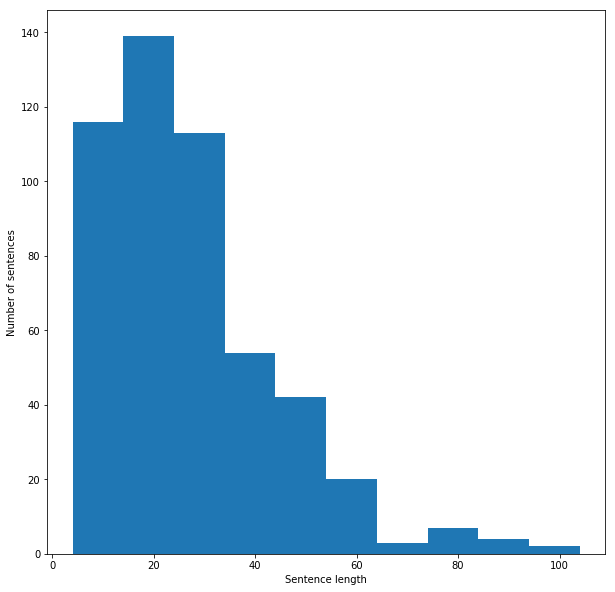

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()


# Enter Embeddings

1. Bag of Words Counts

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = sample["clean_text"].tolist()

counts, count_vectorizer = cv(list_corpus)

In [62]:
sample.columns

Index(['id', 'text', 'author', 'clean_text', 'tokens'], dtype='object')

In [0]:
list_labels = sample["author"].astype("category").cat.codes.tolist()

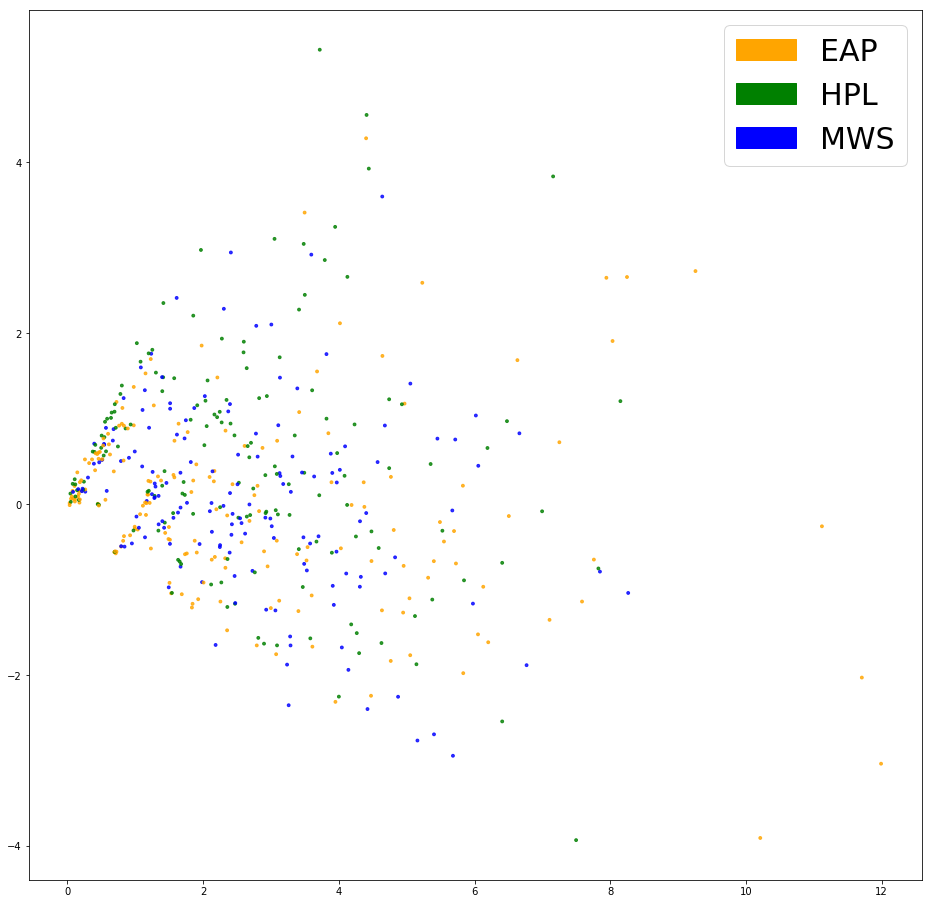

In [64]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','green']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='EAP')
            green_patch = mpatches.Patch(color='green', label='HPL')
            blue_patch = mpatches.Patch(color='blue', label='MWS')
            plt.legend(handles=[red_patch, green_patch,blue_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(counts, list_labels)
plt.show()

In [0]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

list_corpus = sample["clean_text"].tolist()
tfidf, tfidf_vectorizer = tfidf(list_corpus)

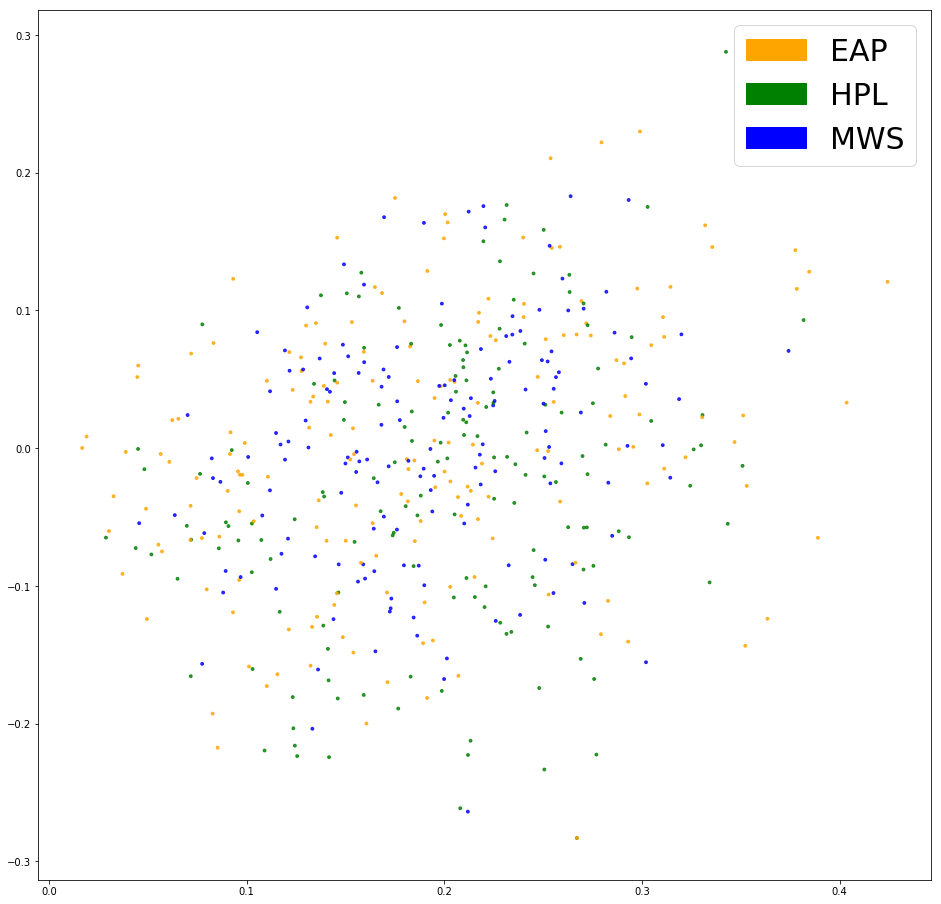

In [66]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','green']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='EAP')
            green_patch = mpatches.Patch(color='green', label='HPL')
            blue_patch = mpatches.Patch(color='blue', label='MWS')
            plt.legend(handles=[red_patch, green_patch,blue_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(tfidf, list_labels)
plt.show()

## Unsupervised Methods

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [0]:
def initial_clean(text):
    """
    Function to clean text of websites, email addresess and any punctuation
    We also lower case the text
    """
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    return text

stop_words = stopwords.words('english')
def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in text if word not in stop_words]

stemmer = PorterStemmer()
def stem_words(text):
    """
    Function to stem words, so plural and singular are treated the same
    """
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] # make sure we have no 1 letter words
    except IndexError: # the word "oed" broke this, so needed try except
        pass
    return text

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return stem_words(remove_stop_words(initial_clean(text)))

In [69]:
sample.head()

,id,text,author,clean_text,tokens
0,id26305,"This process, however, afforded me no means of...",EAP,"this process, however, afforded me no means of...","[this, process, however, afforded, me, no, mea..."
1,id17569,It never once occurred to me that the fumbling...,HPL,it never once occurred to me that the fumbling...,"[it, never, once, occurred, to, me, that, the,..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"in his left hand was a gold snuff box, from wh...","[in, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,how lovely is spring as we looked from windsor...,"[how, lovely, is, spring, as, we, looked, from..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"finding nothing else, not even gold, the super...","[finding, nothing, else, not, even, gold, the,..."


In [70]:
# clean text and create new column "tokenized"
t1 = time.time()
sample['tokenized'] = sample['text'].apply(apply_all) 
t2 = time.time()
print("Time to clean and tokenize", len(sample), "articles:", (t2-t1)/60, "min")

Time to clean and tokenize 500 articles: 0.009908358256022135 min


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
# first get a list of all words
all_words = [word for item in list(sample['tokenized']) for word in item]
# use nltk fdist to get a frequency distribution of all words
fdist = FreqDist(all_words)
len(fdist) # number of unique words

2959

In [72]:
k = 1000
top_k_words = fdist.most_common(k)
top_k_words[-10:]

[('paint', 2),
 ('contempl', 2),
 ('acquir', 2),
 ('hear', 2),
 ('devil', 2),
 ('tast', 2),
 ('charnel', 2),
 ('enough', 2),
 ('parti', 2),
 ('centuri', 2)]

In [0]:
# define a function only to keep words in the top k words
top_k_words,_ = zip(*fdist.most_common(k))
top_k_words = set(top_k_words)
def keep_top_k_words(text):
    return [word for word in text if word in top_k_words]

In [74]:
sample["tokenized"][:4]

0    [process, howev, afford, mean, ascertain, dime...
1           [never, occur, fumbl, might, mere, mistak]
2    [left, hand, gold, snuff, box, caper, hill, cu...
3    [love, spring, look, windsor, terrac, sixteen,...
Name: tokenized, dtype: object

In [75]:
sample['tokenized'] = sample['tokenized'].apply(keep_top_k_words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
sample["tokenized"][:4]

0    [howev, afford, mean, ascertain, might, make, ...
1                          [never, occur, might, mere]
2    [left, hand, gold, snuff, box, hill, cut, mann...
3    [love, look, windsor, terrac, counti, spread, ...
Name: tokenized, dtype: object

In [77]:
# document length
sample['doc_len'] = sample['tokenized'].apply(lambda x: len(x))
doc_lengths = list(sample['doc_len'])
sample.drop(labels='doc_len', axis=1, inplace=True)

print("length of list:",len(doc_lengths),
      "\naverage document length", np.average(doc_lengths),
      "\nminimum document length", min(doc_lengths),
      "\nmaximum document length", max(doc_lengths))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


length of list: 500 
average document length 8.71 
minimum document length 0 
maximum document length 38


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


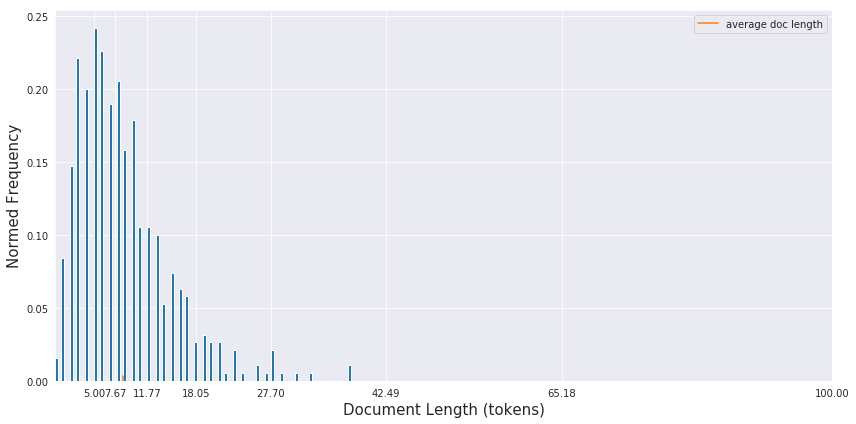

In [78]:
# plot a histogram of document length
num_bins = 100
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
n, bins, patches = ax.hist(doc_lengths, num_bins, normed=1)
ax.set_xlabel('Document Length (tokens)', fontsize=15)
ax.set_ylabel('Normed Frequency', fontsize=15)
ax.grid()
ax.set_xticks(np.logspace(start=np.log10(5),stop=np.log10(100),num=8, base=10.0))
plt.xlim(0,100)
ax.plot([np.average(doc_lengths) for i in np.linspace(0.0,0.0035,100)], np.linspace(0.0,0.0035,100), '-',
        label='average doc length')
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

In [79]:
# only keep articles with more than 30 tokens, otherwise too short
sample = sample[sample['tokenized'].map(len) >= 6]
# make sure all tokenized items are lists
sample = sample[sample['tokenized'].map(type) == list]
sample.reset_index(drop=True,inplace=True)
print("After cleaning and excluding short aticles, the dataframe now has:", len(sample), "articles")

After cleaning and excluding short aticles, the dataframe now has: 327 articles


In [80]:
# create a mask of binary values
msk = np.random.rand(len(sample)) < 0.95
msk.sum()

311

In [0]:
train_df = sample[msk]
train_df.reset_index(drop=True,inplace=True)

test_df = sample[~msk]
test_df.reset_index(drop=True,inplace=True)

In [82]:
print(len(sample),len(train_df),len(test_df))

327 311 16


In [0]:
def train_lda(data):
    """
    This function trains the lda model
    We setup parameters like number of topics, the chunksize to use in Hoffman method
    We also do 2 passes of the data since this is a small dataset, so we want the distributions to stabilize
    """
    num_topics = 10
    chunksize = 300
    dictionary = corpora.Dictionary(data['tokenized'])
    corpus = [dictionary.doc2bow(doc) for doc in data['tokenized']]
    t1 = time.time()
    # low alpha means each document is only represented by a small number of topics, and vice versa
    # low eta means each topic is only represented by a small number of words, and vice versa
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
                   alpha=1e-2, eta=0.5e-2, chunksize=chunksize, minimum_probability=0.0, passes=2)
    t2 = time.time()
    print("Time to train LDA model on ", len(sample), "articles: ", (t2-t1)/60, "min")
    return dictionary,corpus,lda

In [84]:
dictionary,corpus,lda = train_lda(train_df)

2019-09-22 08:07:24,944 too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
Time to train LDA model on  327 articles:  0.003716778755187988 min


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [85]:
# show_topics method shows the the top num_words contributing to num_topics number of random topics
lda.show_topics(num_topics=10, num_words=20)

[(0,
  '0.043*"whose" + 0.042*"terribl" + 0.042*"man" + 0.041*"came" + 0.041*"shape" + 0.041*"head" + 0.041*"voic" + 0.041*"question" + 0.041*"pale" + 0.040*"told" + 0.040*"altogeth" + 0.040*"knew" + 0.040*"confess" + 0.040*"gentli" + 0.040*"trifl" + 0.037*"present" + 0.036*"yet" + 0.033*"one" + 0.027*"time" + 0.011*"fanci"'),
 (1,
  '0.042*"howev" + 0.041*"surfac" + 0.041*"suffici" + 0.041*"thu" + 0.040*"believ" + 0.040*"beheld" + 0.040*"peac" + 0.040*"tabl" + 0.039*"line" + 0.039*"defeat" + 0.038*"light" + 0.038*"us" + 0.037*"remain" + 0.037*"upon" + 0.036*"especi" + 0.036*"think" + 0.036*"round" + 0.034*"form" + 0.026*"eye" + 0.013*"could"'),
 (2,
  '0.136*"doubt" + 0.134*"charact" + 0.131*"obscur" + 0.129*"tone" + 0.009*"two" + 0.009*"great" + 0.008*"never" + 0.007*"wonder" + 0.006*"time" + 0.006*"nopoli" + 0.006*"alexand" + 0.006*"name" + 0.006*"good" + 0.005*"lay" + 0.005*"sheehan" + 0.005*"would" + 0.005*"certain" + 0.005*"live" + 0.005*"room" + 0.004*"one"'),
 (3,
  '0.085*"biz

In [86]:
lda.show_topic(topicid=4, topn=20)

[('suffer', 0.074391894),
 ('ever', 0.044888504),
 ('wild', 0.043002684),
 ('circumst', 0.042733785),
 ('repos', 0.04238307),
 ('rest', 0.04224885),
 ('word', 0.041972544),
 ('excel', 0.041237384),
 ('endeavour', 0.041237384),
 ('idea', 0.04072534),
 ('star', 0.039210614),
 ('fire', 0.03917178),
 ('must', 0.037527777),
 ('mind', 0.030741539),
 ('mad', 0.030373449),
 ('heart', 0.025627788),
 ('make', 0.023673685),
 ('even', 0.022102753),
 ('perhap', 0.021543717),
 ('also', 0.017588459)]

In [87]:
train_df

,id,text,author,clean_text,tokens,tokenized
0,id26305,"This process, however, afforded me no means of...",EAP,"this process, however, afforded me no means of...","[this, process, however, afforded, me, no, mea...","[howev, afford, mean, ascertain, might, make, ..."
1,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"in his left hand was a gold snuff box, from wh...","[in, his, left, hand, was, a, gold, snuff, box...","[left, hand, gold, snuff, box, hill, cut, mann..."
2,id27763,How lovely is spring As we looked from Windsor...,MWS,how lovely is spring as we looked from windsor...,"[how, lovely, is, spring, as, we, looked, from...","[love, look, windsor, terrac, counti, spread, ..."
3,id12958,"Finding nothing else, not even gold, the Super...",HPL,"finding nothing else, not even gold, the super...","[finding, nothing, else, not, even, gold, the,...","[find, noth, els, even, gold, superintend, aba..."
4,id22965,"A youth passed in solitude, my best years spen...",MWS,"a youth passed in solitude, my best years spen...","[a, youth, passed, in, solitude, my, best, yea...","[youth, pass, solitud, best, year, spent, gent..."
5,id09674,"The astronomer, perhaps, at this point, took r...",EAP,"the astronomer, perhaps, at this point, took r...","[the, astronomer, perhaps, at, this, point, to...","[perhap, point, took, refug, suggest, suddenli..."
6,id19322,I knew that you could not say to yourself 'ste...,EAP,i knew that you could not say to yourself 'ste...,"[i, knew, that, you, could, not, say, to, your...","[knew, could, say, without, brought, think, th..."
7,id00912,I confess that neither the structure of langua...,MWS,i confess that neither the structure of langua...,"[i, confess, that, neither, the, structure, of...","[confess, neither, languag, variou, state, pos..."
8,id16737,He shall find that I can feel my injuries; he ...,MWS,he shall find that i can feel my injuries he ...,"[he, shall, find, that, i, can, feel, my, inju...","[shall, find, feel, injuri, shall, learn, drea..."
9,id19764,Herbert West needed fresh bodies because his l...,HPL,herbert west needed fresh bodies because his l...,"[herbert, west, needed, fresh, bodies, because...","[herbert, west, need, fresh, bodi, life, work,..."


In [88]:
# select and article at random from train_df
random_article_index = np.random.randint(len(train_df))
bow = dictionary.doc2bow(train_df.iloc[random_article_index,5])
print(random_article_index)

304


In [89]:
print(train_df.iloc[random_article_index,1])

Then came the frenzied tones again: "Carter, it's terrible monstrous unbelievable" This time my voice did not fail me, and I poured into the transmitter a flood of excited questions.


In [0]:
# get the topic contributions for the document chosen at random above
doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])

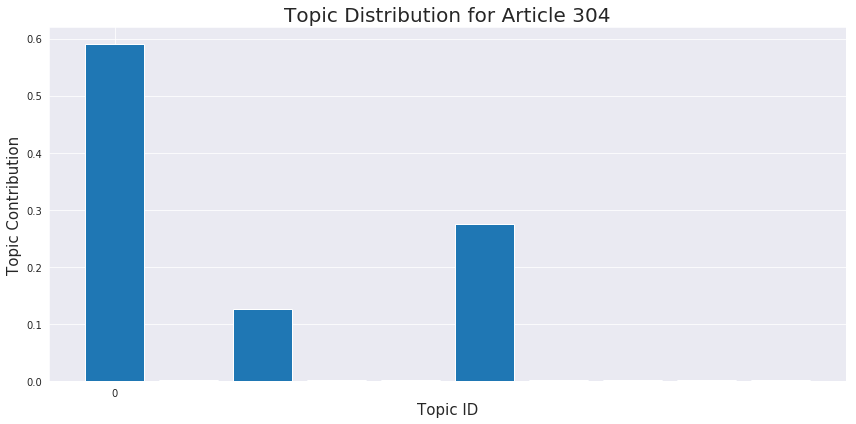

In [91]:
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + str(random_article_index), fontsize=20)
ax.set_xticks(np.linspace(0,11,1))
fig.tight_layout()
plt.show()

In [92]:
# print the top 5 contributing topics and their words
for i in doc_distribution.argsort()[-5:][::-1]:
    print(i, lda.show_topic(topicid=i, topn=10), "\n")

0 [('whose', 0.04294102), ('terribl', 0.04219726), ('man', 0.0421711), ('came', 0.04118714), ('shape', 0.0410552), ('head', 0.040800832), ('voic', 0.040612638), ('question', 0.040610984), ('pale', 0.040586483), ('told', 0.04013148)] 

5 [('feel', 0.055080347), ('love', 0.054834433), ('excit', 0.05417064), ('silenc', 0.054029528), ('fact', 0.05399995), ('pour', 0.053371955), ('public', 0.053366005), ('burn', 0.052715566), ('member', 0.052701004), ('pass', 0.0392576)] 

2 [('doubt', 0.13555963), ('charact', 0.1342346), ('obscur', 0.13138913), ('tone', 0.12942125), ('two', 0.009046865), ('great', 0.008932847), ('never', 0.007976292), ('wonder', 0.0070326733), ('time', 0.0063728797), ('nopoli', 0.0059739165)] 

9 [('come', 0.11369174), ('weep', 0.058714274), ('could', 0.04825919), ('present', 0.031454433), ('better', 0.030927656), ('assum', 0.030195978), ('dread', 0.02996498), ('cri', 0.029852657), ('pride', 0.029852655), ('endur', 0.029764786)] 

8 [('appear', 0.14736642), ('might', 0.075

In [93]:
# select and article at random from test_df
random_article_index = np.random.randint(len(test_df))
print(random_article_index)

15


In [0]:
new_bow = dictionary.doc2bow(test_df.iloc[random_article_index,5])

In [95]:
print(test_df.iloc[random_article_index,1])

, it will be seen at pp. and , that this illustrious chemist had not only conceived the idea now in question, but had actually made no inconsiderable progress, experimentally, in the very identical analysis now so triumphantly brought to an issue by Von Kempelen, who although he makes not the slightest allusion to it, is, without doubt I say it unhesitatingly, and can prove it, if required, indebted to the 'Diary' for at least the first hint of his own undertaking.


In [0]:
new_doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=new_bow)])

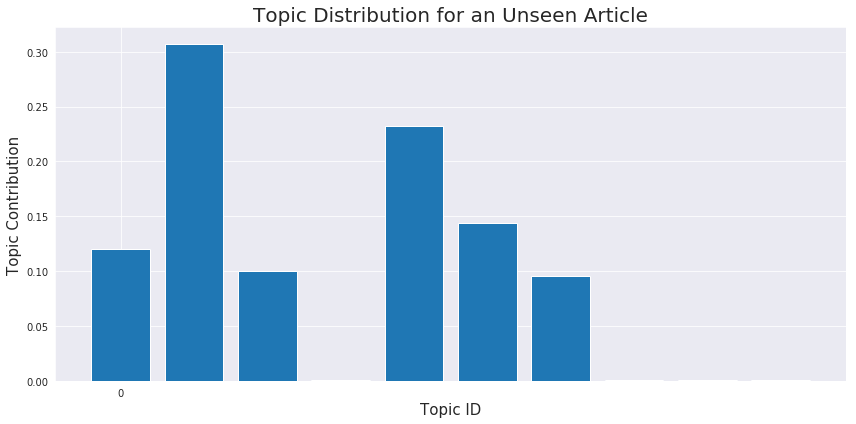

In [97]:
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(new_doc_distribution)), new_doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for an Unseen Article", fontsize=20)
ax.set_xticks( np.linspace(0,10,1))
ax.set_xticklabels(list([i for i in np.arange(10)]))
fig.tight_layout()
plt.show()

In [98]:
# print the top 8 contributing topics and their words
for i in new_doc_distribution.argsort()[-5:][::-1]:
    print(i, lda.show_topic(topicid=i, topn=10), "\n")

1 [('howev', 0.04161826), ('surfac', 0.04135195), ('suffici', 0.041113265), ('thu', 0.040618632), ('believ', 0.040168345), ('beheld', 0.040139418), ('peac', 0.03980857), ('tabl', 0.039710365), ('line', 0.039208543), ('defeat', 0.039208543)] 

4 [('suffer', 0.074391894), ('ever', 0.044888504), ('wild', 0.043002684), ('circumst', 0.042733785), ('repos', 0.04238307), ('rest', 0.04224885), ('word', 0.041972544), ('endeavour', 0.041237384), ('excel', 0.041237384), ('idea', 0.04072534)] 

5 [('feel', 0.055080347), ('love', 0.054834433), ('excit', 0.05417064), ('silenc', 0.054029528), ('fact', 0.05399995), ('pour', 0.053371955), ('public', 0.053366005), ('burn', 0.052715566), ('member', 0.052701004), ('pass', 0.0392576)] 

0 [('whose', 0.04294102), ('terribl', 0.04219726), ('man', 0.0421711), ('came', 0.04118714), ('shape', 0.0410552), ('head', 0.040800832), ('voic', 0.040612638), ('question', 0.040610984), ('pale', 0.040586483), ('told', 0.04013148)] 

2 [('doubt', 0.13555963), ('charact', 0

In [99]:
# we need to use nested list comprehension here
# this may take 1-2 minutes...
doc_topic_dist = np.array([[tup[1] for tup in lst] for lst in lda[corpus]])
doc_topic_dist.shape

(311, 10)

In [0]:
def jensen_shannon(query, matrix):
    """
    This function implements a Jensen-Shannon similarity
    between the input query (an LDA topic distribution for a document)
    and the entire corpus of topic distributions.
    It returns an array of length M where M is the number of documents in the corpus
    """
    # lets keep with the p,q notation above
    p = query[None,:].T # take transpose
    q = matrix.T # transpose matrix
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))


In [0]:
def get_most_similar_documents(query,matrix,k=10):
    """
    This function implements the Jensen-Shannon distance above
    and retruns the top k indices of the smallest jensen shannon distances
    """
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances

In [0]:
# this is surprisingly fast
most_sim_ids = get_most_similar_documents(new_doc_distribution,doc_topic_dist)

In [103]:
most_similar_df = train_df[train_df.index.isin(most_sim_ids)]
most_similar_df['text'].to_list()

['A youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so refined the groundwork of my character that I cannot overcome an intense distaste to the usual brutality exercised on board ship: I have never believed it to be necessary, and when I heard of a mariner equally noted for his kindliness of heart and the respect and obedience paid to him by his crew, I felt myself peculiarly fortunate in being able to secure his services.',
 "I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you could not avoid casting your eyes upward to the great nebula in Orion, and I certainly expected that you would do so.",
 'To these speeches they gave, of 

## References

[NER and POS tags](https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da)
<br>
[NER Tags](https://natural-language-understanding.fandom.com/wiki/Named_entity_recognition)